# EDA: Exploratory Data Analysis
In this notebook we analyse the data and extract a smaller article data from the selected stocks

# 1. Download the data and import used packages 
The data requires 25GB storage and 25 GB RAM. For the analysis of the chosen stock (GE) jump to 3.

In [142]:
! mkdir /code/data
! wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/nasdaq_exteral_data.csv -O /code/data/nasdaq_exteral_data.csv

mkdir: cannot create directory ‘/code/data’: File exists
--2024-04-24 19:43:30--  https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/nasdaq_exteral_data.csv
Resolving huggingface.co (huggingface.co)... 13.32.110.55, 13.32.110.109, 13.32.110.28, ...
Connecting to huggingface.co (huggingface.co)|13.32.110.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/a0/19/a01967ba742831f4b6903f146b4f5d9a3d2eeeefa619387e8cc87df2d889332c/1a7a3eb8e6b97ec19f286f2cfca3371542bddb272ab1eb8f36e33ad98fa5c4da?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27nasdaq_exteral_data.csv%3B+filename%3D%22nasdaq_exteral_data.csv%22%3B&response-content-type=text%2Fcsv&Expires=1714247011&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNDI0NzAxMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2EwLzE5L2EwMTk2N2JhNzQyODMxZjRiNjkwM2YxNDZiNGY1Z

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

# 2. Load and examine data
The data requires 25GB RAM. Load it on own's risk

In [115]:
df = pd.read_csv('/code/data/nasdaq_exteral_data.csv', index_col=0)
df.head()

/tmp/ipykernel_3054/1433631666.py:1: DtypeWarning: Columns (3,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/code/data/nasdaq_exteral_data.csv', index_col=0)


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
Unnamed: 0,,,,,,,,,,,
0.0,2023-12-16 23:00:00 UTC,Interesting A Put And Call Options For August ...,A,https://www.nasdaq.com/articles/interesting-a-...,NaN,NaN,"Investors in Agilent Technologies, Inc. (Symbo...",Because the $125.00 strike represents an appro...,The current analytical data (including greeks ...,Below is a chart showing the trailing twelve m...,"At Stock Options Channel, our YieldBoost formu..."
1.0,2023-12-12 00:00:00 UTC,Wolfe Research Initiates Coverage of Agilent T...,A,https://www.nasdaq.com/articles/wolfe-research...,NaN,NaN,"Fintel reports that on December 13, 2023, Wolf...","Fintel reports that on December 13, 2023, Wolf...","T. Rowe Price Investment Management holds 10,1...",Agilent Technologies Declares $0.24 Dividend O...,The projected annual revenue for Agilent Techn...
2.0,2023-12-12 00:00:00 UTC,Agilent Technologies Reaches Analyst Target Price,A,https://www.nasdaq.com/articles/agilent-techno...,NaN,NaN,"In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...",When a stock reaches the target an analyst has...,When a stock reaches the target an analyst has...
3.0,2023-12-07 00:00:00 UTC,Agilent (A) Enhances BioTek Cytation C10 With ...,A,https://www.nasdaq.com/articles/agilent-a-enha...,NaN,NaN,Agilent Technologies A is enhancing its BioTek...,"Per a Grand View Research report, the global m...","Notably, Agilent enhanced the BioTek Cytation ...","Agilent Technologies, Inc. Price and Consensus...","Notably, Agilent enhanced the BioTek Cytation ..."
4.0,2023-12-07 00:00:00 UTC,"Pre-Market Most Active for Dec 7, 2023 : SQQQ,...",A,https://www.nasdaq.com/articles/pre-market-mos...,NaN,NaN,The NASDAQ 100 Pre-Market Indicator is up 70.2...,ProShares UltraPro Short QQQ (SQQQ) is -0.15 a...,"As reported by Zacks, the current mean recomme...","The total Pre-Market volume is currently 39,23...",The NASDAQ 100 Pre-Market Indicator is up 70.2...


## Examine the data from the chosen tickers
We investigated several well known stocks

In [129]:
tickers = ['MSFT', 'AAPL', 'A', 'V', 'BRK', 'GE', 'XOM']

In [131]:
stock_datas = []

for ticker in tickers:
    stock_data = df[df['Stock_symbol'] == ticker]
    stock_data = stock_data[~stock_data['Article'].isna()]
    stock_datas.append(stock_data)
    
    print(f'Extracted {ticker} with {len(stock_data)} rows')

ext_df = pd.concat(stock_datas, axis=0)
ext_df = ext_df.reset_index(drop=True)
ext_df['Date'] = ext_df['Date'].apply(pd.to_datetime)
ext_df.tail()

Extracted MSFT with 8737 rows
Extracted AAPL with 8865 rows
Extracted A with 379 rows
Extracted V with 6945 rows
Extracted BRK with 8797 rows
Extracted GE with 8680 rows
Extracted XOM with 6757 rows


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
49155,2019-08-26 00:00:00+00:00,Why Debt is a Bigger Problem for ExxonMobil Th...,XOM,https://www.nasdaq.com/articles/why-debt-is-a-...,NaN,NaN,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...
49156,2019-08-26 00:00:00+00:00,7 High-Yielding Dividend Stocks to Buy for the...,XOM,https://www.nasdaq.com/articles/7-high-yieldin...,NaN,NaN,When the United States Federal Reserve ended i...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...
49157,2019-08-26 00:00:00+00:00,Don’t Count on High Returns With Exxon Mobil,XOM,https://www.nasdaq.com/articles/dont-count-on-...,NaN,NaN,Exxon Mobil (NYSE:) stock needs something to m...,"But in the long term, could investors see a ma...",XOM Stock Valuation Exxon Mobil stock continue...,XOM Stock Valuation Exxon Mobil stock continue...,"But in the long term, could investors see a ma..."
49158,2019-08-26 00:00:00+00:00,"Energy Sector Update for 08/26/2019: HUSA, SRC...",XOM,https://www.nasdaq.com/articles/energy-sector-...,NaN,NaN,Top Energy Stocks:\nXOM: +1.26%\nCVX: +0.70%\n...,The global benchmark Brent crude October contr...,Top Energy Stocks: The global benchmark Brent ...,"Among energy-related ETFs, the United States O...",Top Energy Stocks: The global benchmark Brent ...
49159,2019-08-25 00:00:00+00:00,Danger Lurks for These 2 High-Yield Dividend S...,XOM,https://www.nasdaq.com/articles/danger-lurks-f...,NaN,NaN,Energy companies have a spotty history when it...,"In addition to that, Summit recently formed a ...","In addition to that, Summit recently formed a ...","In addition to that, Summit recently formed a ...","In addition to that, Summit recently formed a ..."


## Compare context lengths and the time distrubution of the articles of different stocks
A token is around 0.75*word

In [132]:
get_token_number = lambda x: len(x['Article'].replace('.!?:-',' ').split(' '))/0.75

In [133]:
tickers = list(ext_df['Stock_symbol'].unique())
tickers

['MSFT', 'AAPL', 'A', 'V', 'BRK', 'GE', 'XOM']

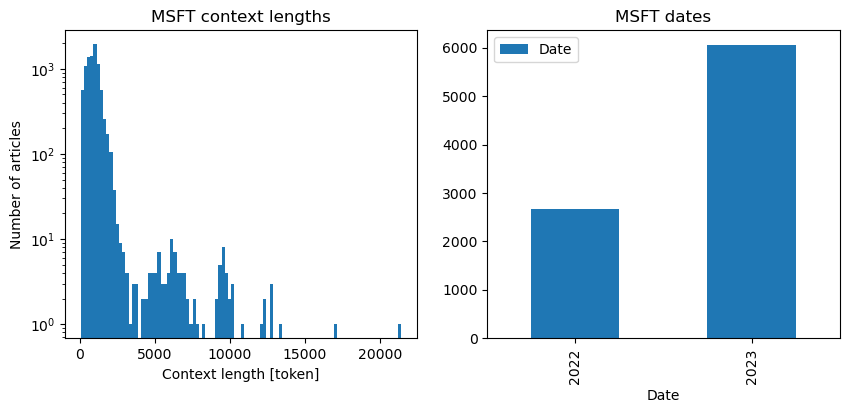

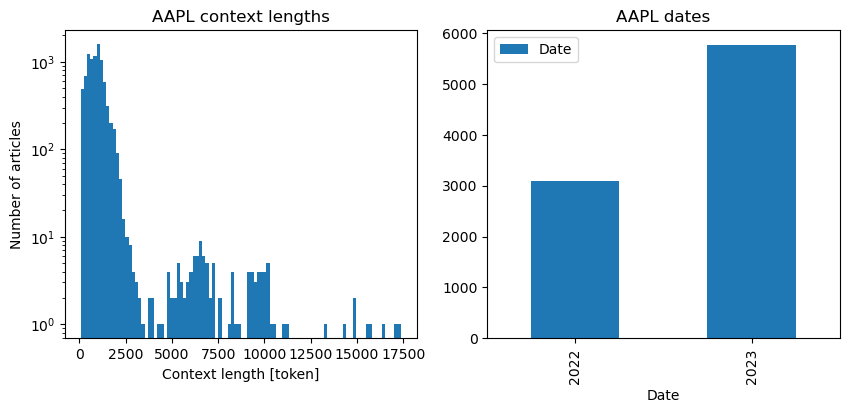

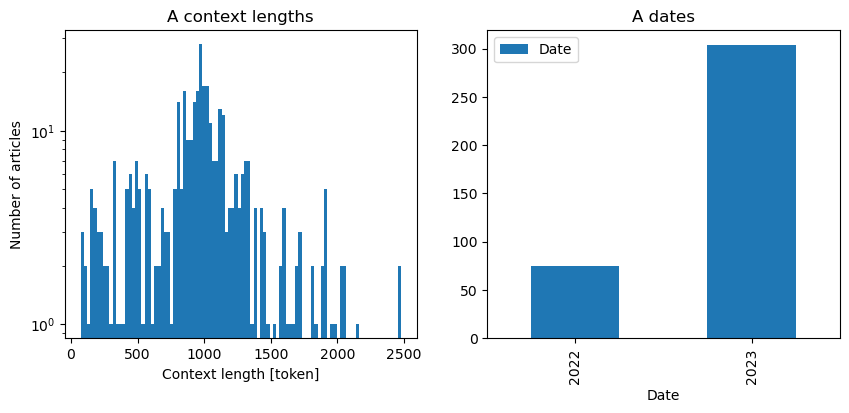

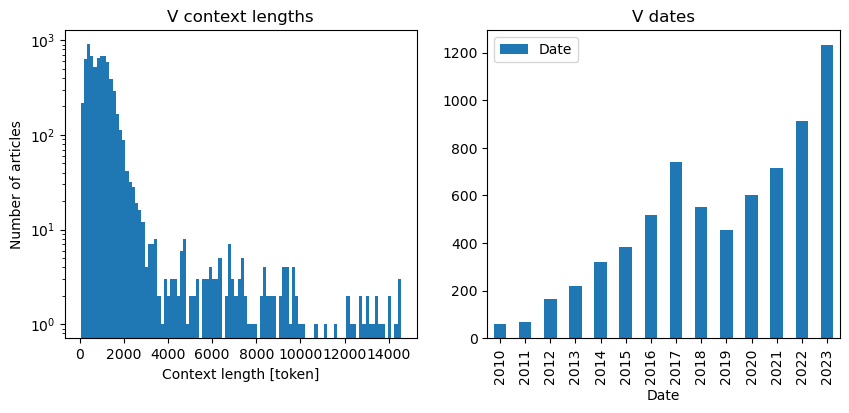

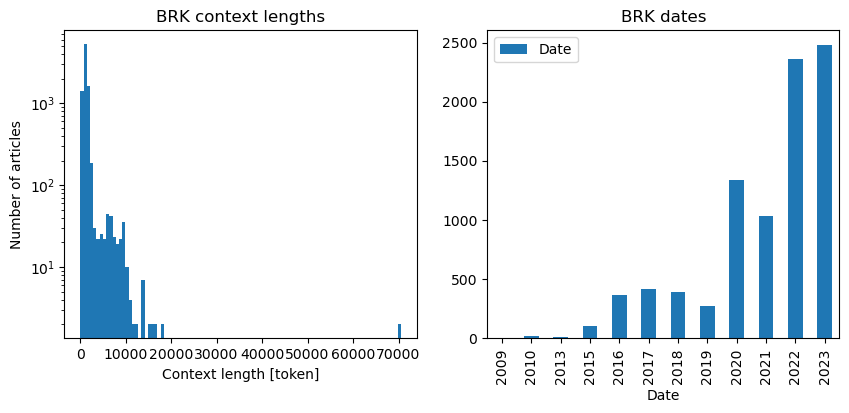

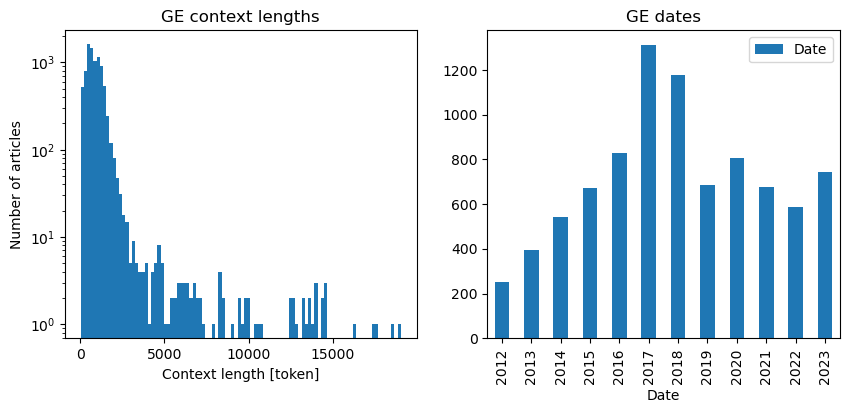

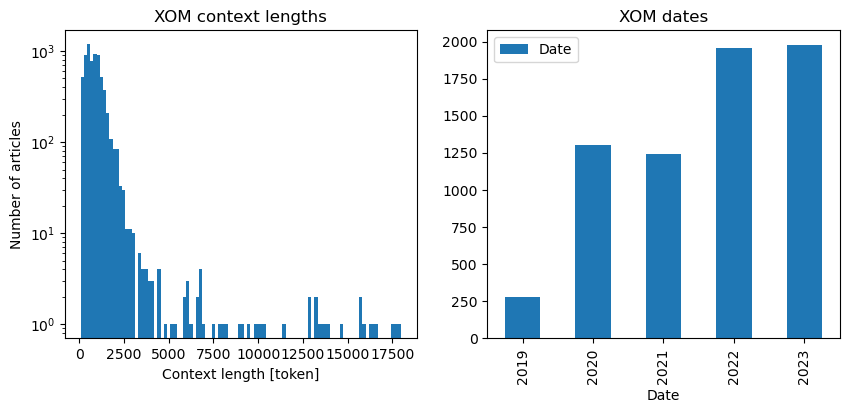

In [135]:
for ticker in tickers:
    token_numbers = ext_df[ext_df['Stock_symbol'] == ticker].apply(get_token_number, axis=1)
    dates = ext_df[ext_df['Stock_symbol'] == ticker].Date.to_frame()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.hist(token_numbers, bins=100)
    ax1.set_yscale('log')
    ax1.set_title(f'{ticker} context lengths')
    ax1.set_xlabel('Context length [token]')
    ax1.set_ylabel('Number of articles')
    
    dates.groupby([dates["Date"].dt.year]).count().plot(kind="bar", ax=ax2)
    ax2.set_title(f'{ticker} dates')

## Select `GE` and save it
We decided to go use `GE`:
- it has a large number of articles
- its articles are from a large timespan (10 years) with a good distribution
- it had bull, bear and neutral trend: it is better for actually investigating the usability of sentiment (for a stock that only goes up the trading algorithm could just overfit to always predict upward movement)

In [143]:
chosen_stock = 'GE'

In [144]:
ext_df[ext_df['Stock_symbol'] == chosen_stock].to_csv('/code/data/extracted_data.csv', index=False)

# 3. Select `GE` and make deeper investigation

## Load the extracted data back
To make sure for the analyzed and later used data to be the same

In [148]:
chosen_stock = 'GE'

ext_df = pd.read_csv('/code/data/extracted_data.csv')
ext_df['Date'] = ext_df['Date'].apply(pd.to_datetime)

# check the tickers and the length of the data
print(f'Extracted {chosen_stock} with {len(ext_df)} rows')
print('Stocks in the data: ', list(ext_df['Stock_symbol'].unique()))

ext_df.tail()

Extracted GE with 8680 rows
Stocks in the data:  ['GE']


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
8675,2012-04-23 00:00:00+00:00,Nomura Maintains a “Buy” on General Electric; ...,GE,https://www.nasdaq.com/articles/nomura-maintai...,NaN,NaN,Multinational conglomerate General Electric Co...,Multinational conglomerate General Electric Co...,Multinational conglomerate General Electric Co...,Multinational conglomerate General Electric Co...,Multinational conglomerate General Electric Co...
8676,2012-04-23 00:00:00+00:00,"After Hours Most Active for Apr 23, 2012 : ANR...",GE,https://www.nasdaq.com/articles/after-hours-mo...,NaN,NaN,The NASDAQ 100 After Hours Indicator is up .49...,"As reported by Zacks, the current mean recomme...",The consensus earnings per share forecast is 1...,The consensus earnings per share forecast is 1...,The consensus earnings per share forecast is 1...
8677,2012-04-20 00:00:00+00:00,Earnings Shine a Ray of Light - Analyst Blog,GE,https://www.nasdaq.com/articles/earnings-shine...,NaN,NaN,Earnings reports will provide the primary back...,"Of this morning's major releases, we got posit...","Of this morning's major releases, we got posit...",With almost a quarter of the results already i...,"Of this morning's major releases, we got posit..."
8678,2012-04-20 00:00:00+00:00,"Stock Market News for April 20, 2012 - Market ...",GE,https://www.nasdaq.com/articles/stock-market-n...,NaN,NaN,Strong earnings results from financial bellwet...,Strong earnings results from financial bellwet...,"Looking at the blue-chip index, General Electr...",APPLE INC ( AAPL ): Free Stock Analysis Report...,Strong earnings results from financial bellwet...
8679,2012-04-20 00:00:00+00:00,"Ahead of Wall Street - April 20, 2012 - Ahead ...",GE,https://www.nasdaq.com/articles/ahead-wall-str...,NaN,NaN,"Friday, April 20, 2012\nEarnings reports will ...",It is perhaps fair to say that this earnings s...,"Of this morning's major releases, we got posit...",With almost a quarter of the results already i...,General Electric's strength was mostly from th...


## Plot with the stock movement

### Get first and last+1 day's date

In [27]:
start_date = list(ext_df['Date'])[-1].to_pydatetime().replace(hour=0, minute=0)
end_date = list(ext_df['Date'])[0].to_pydatetime().replace(hour=0, minute=0) + datetime.timedelta(days = 1)
print(start_date, end_date)

2012-04-20 00:00:00+00:00 2023-12-17 00:00:00+00:00


### Load the corresponding daily stock prices

In [139]:
stock_price = yf.Ticker(chosen_stock).history(start=start_date, end=end_date, period="1day", auto_adjust=False, actions=False)[['Adj Close']]
stock_price.tail()

,Adj Close
Date,
2023-12-11 00:00:00-05:00,95.747803
2023-12-12 00:00:00-05:00,97.371727
2023-12-13 00:00:00-05:00,96.464241
2023-12-14 00:00:00-05:00,96.599564
2023-12-15 00:00:00-05:00,98.096123


### Plot the context size, yearly article number and the stock price

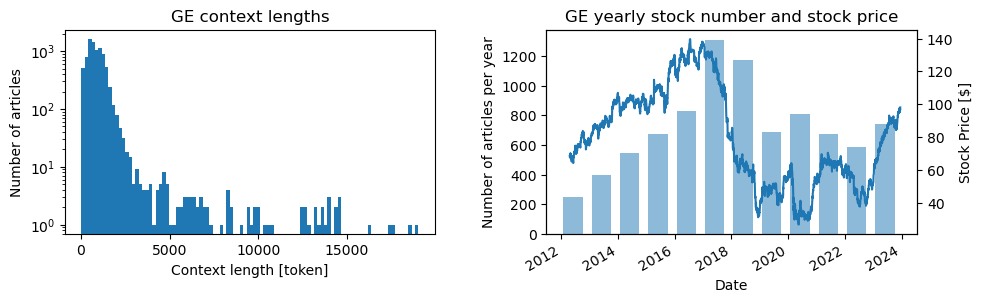

In [113]:
token_numbers = ext_df.apply(lambda x: len(x['Article'].replace('.!?:-',' ').split(' '))/0.75, axis=1)
dates = ext_df.Date.to_frame()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.hist(token_numbers, bins=100)
ax1.set_yscale('log')
ax1.set_title(f'{chosen_stock} context lengths')
ax1.set_xlabel('Context length [token]')
ax1.set_ylabel('Number of articles')

# dates.groupby([dates["Date"].dt.year]).count().plot(kind="bar", ax=ax2)
data = dates.groupby([dates["Date"].dt.year]).count()
data.index = [datetime.datetime.strptime(f'{date}-06', '%Y-%m') for date in list(data.index)]
ax2.bar(data.index, data.Date, width=250, alpha=0.5)
ax2.set_title(f'{chosen_stock} yearly article number and stock price')
ax2.set_ylabel('Number of articles per year')

stock_price['Adj Close'].plot(ax=ax2, secondary_y=True)
plt.ylabel('Stock Price [$]', fontsize=10)

plt.show()